In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.spatial.distance as dist
from collections import Counter
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram, cophenet
import seaborn as sns

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [4]:
# select Substitution distance
# LCS OM LCS NMS
Substitution = 'LCP'
seq_dist = pd.read_csv('./dataset/'+Substitution+'.csv')
X = seq_dist.values
X = X.astype(np.float64)

In [248]:
# calculation distance
seq = np.load('./dataset/sequence_embedding.npy')
X = seq
#X = dist.cdist(seq, seq, 'euclidean')

# Substitution distance AgglomerativeClustering

linkage =  single 
 Best  Silhouette Coefficient 0.5770839901945863 
 Optimal number of cluster 2
linkage =  complete 
 Best  Silhouette Coefficient 0.37470514797880167 
 Optimal number of cluster 5
linkage =  average 
 Best  Silhouette Coefficient 0.5770839901945863 
 Optimal number of cluster 2


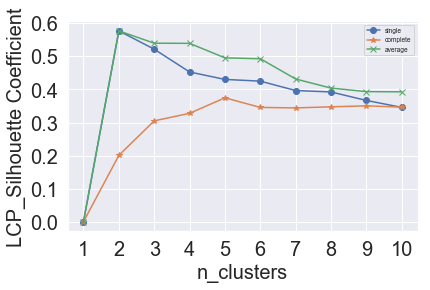

In [447]:
min_c = 2
max_c = 10

# linkage = single complete average
linkage_list = ['single', 'complete', 'average']
Scores = []


for i in range(len(linkage_list)):
    Scores.append([])
    Scores[i].append(0)
    for k in range(min_c ,max_c+1):
        # affinity = precomputed(預先算好的dist) / euclidean (ward)
        estimator = AgglomerativeClustering(n_clusters=k, affinity = 'precomputed', linkage= linkage_list[i]).fit(X)
        Scores[i].append(silhouette_score(X, estimator.labels_, metric='precomputed'))       
    print('linkage = ',linkage_list[i], '\n Best  Silhouette Coefficient', max(Scores[i]),  '\n Optimal number of cluster', Scores[i].index(max(Scores[i]))+1)
        
x_axis = range(min_c-1, max_c+1, 1)
plt.xlabel('n_clusters',fontsize=20)
plt.ylabel(Substitution+'_Silhouette Coefficient',fontsize=20)
plt.xticks(x_axis,fontsize=20)
plt.yticks(fontsize=20)
plt.plot(x_axis, Scores[0], 'o-', label=linkage_list[0])
plt.plot(x_axis, Scores[1], '*-', label=linkage_list[1])
plt.plot(x_axis, Scores[2], 'x-', label=linkage_list[2])
plt.legend(loc="best")
plt.tight_layout()
plt.savefig('./image/Silhouette_Coefficient/'+Substitution, dpi=300)
plt.show()

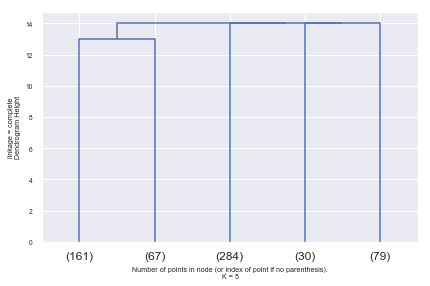

In [451]:
lk = 'complete'
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity = 'precomputed', linkage= lk).fit(X)
P = 5
plot_dendrogram(model, truncate_mode='lastp', p=P, color_threshold =0) # p : show only the last p merged clusters
plt.xlabel("Number of points in node (or index of point if no parenthesis).\n K = " + str(P))
plt.ylabel('linkage = ' + lk +'\n Dendrogram Height')
plt.tight_layout()
plt.savefig('./image/dendrogram/'+Substitution+'_'+lk+'_'+str(P), dpi=300)
plt.show()

# sequence_embedding AgglomerativeClustering

linkage =  euclidean 
 Best  Silhouette Coefficient 0.562029 
 Optimal number of cluster 2


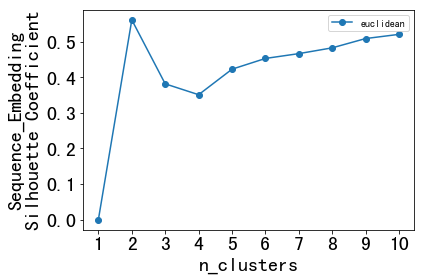

In [113]:
min_c = 2
max_c = 10

Scores = [0]
for k in range(min_c ,max_c+1):
    # affinity = precomputed(預先算好的dist) / euclidean (ward)
    estimator = AgglomerativeClustering(n_clusters=k, affinity = 'euclidean', linkage= 'ward').fit(X)
    Scores.append(silhouette_score(X, estimator.labels_, metric='euclidean'))       
print('linkage = ','euclidean', '\n Best  Silhouette Coefficient', max(Scores),  '\n Optimal number of cluster', Scores.index(max(Scores))+1)
        
x_axis = range(min_c-1, max_c+1, 1)
plt.xlabel('n_clusters',fontsize=20)
plt.ylabel('Sequence_Embedding\nSilhouette Coefficient',fontsize=20)
plt.xticks(x_axis,fontsize=20)
plt.yticks(fontsize=20)
plt.plot(x_axis, Scores, 'o-', label='euclidean')
plt.legend(loc="best")
plt.tight_layout()
plt.savefig('./image/Silhouette_Coefficient/sequence_embedding', dpi=300)
plt.show()

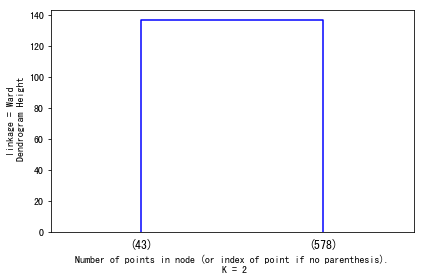

In [114]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity = 'euclidean', linkage= 'ward').fit(X)
P = 2
plot_dendrogram(model, truncate_mode='lastp', p=P, color_threshold =0) # p : show only the last p merged clusters
plt.xlabel("Number of points in node (or index of point if no parenthesis).\n K = " + str(P))
plt.ylabel('linkage = ' + 'Ward' +'\n Dendrogram Height')
plt.tight_layout()
plt.savefig('./image/dendrogram/'+'Sequence_Embedding'+'_'+lk+'_'+str(P), dpi=300)
plt.show()

# Sequence Cluster Visualization

In [10]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math

from matplotlib.font_manager import FontProperties 
import matplotlib.ticker as mtick
import matplotlib.font_manager as fm
font = fm.FontProperties(fname=r'F:\Users\KSLab\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\SimHei.ttf', size=10)
#my9color = ['#1f77b4', '#e377c2', '#ff7f0e', '#ffbb78', '#2ca02c', '#7f7f7f', '#d62728', '#ff9896', '#9467bd']
my9color = sns.color_palette()[:9]


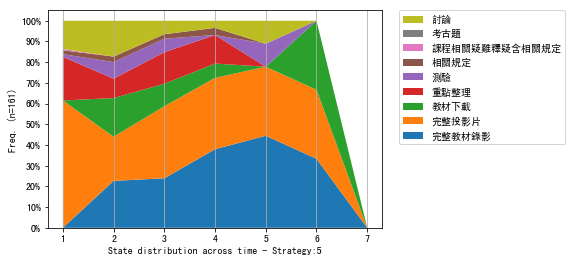

In [54]:
clust = 4
estimator = AgglomerativeClustering(n_clusters=5, affinity = 'precomputed', linkage= 'complete').fit(X)
mask  = (estimator.labels_ == clust)

file_name = 'SP1081_10_17_final_chap'
data = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/sequence/' + file_name + '.csv')
data = data[mask].reset_index(drop=True)

m , n = data.shape
data.drop(['0'],axis = 1,inplace = True)
cate = data[str(1)]
for i in range(2,n):
    cate = set(cate) | set(data[str(i)])
cate = list(cate)
cate.remove(np.nan)

cate = ['完整教材錄影','完整投影片','教材下載','重點整理', '測驗', '相關規定',  '課程相關疑難釋疑含相關規定',  '考古題',  '討論']

y = []

for k in range(len(cate)):
    y.append([])
    for i in range(1,n):
        try:
            y[k].append(data[str(i)].value_counts(normalize=True)[cate[k]])
        except:
            y[k].append(0)

x  = range(1, n, 1)          
labels = cate
fig, ax = plt.subplots()
ax.stackplot(x, y, labels=labels, colors=my9color)
handles, labels = ax.get_legend_handles_labels()
list_bar = list(map(str, range(0,110,10))) 
list_bar = [c+'%' for c in list_bar]
plt.grid(axis="x")
plt.yticks(np.arange(0, 1.1, 0.1),list_bar)
plt.ylabel('Freq. (n='+str(m)+')')
plt.xlabel('State distribution across time - Strategy:'+str(clust+1))
ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop=font)
plt.savefig('./image/Sequence_Vis/Strategy_stack_g='+str(clust+1), dpi=300, bbox_inches = 'tight')
plt.show()

# Cum. % freq.

In [55]:
estimator = AgglomerativeClustering(n_clusters=5, affinity = 'precomputed', linkage= 'complete').fit(X)
mask  = (estimator.labels_ == clust)


file_name = 'SP1081_10_17_final_chap'
data = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/sequence/' + file_name + '.csv')
data = data[mask]


data.drop(['0'],axis = 1,inplace = True)
m , n = data.shape
data_list = data.values.tolist()
result = pd.value_counts(data_list, normalize=True)
top = 10
df = result[:top].rename_axis('unique_values').reset_index(name='counts')

In [56]:
list_ = []
for i in range(n):
    list_.append([])
for row in df['unique_values']:
    for i in range(n):
        list_[i].append(row[i])
        
list_value = []
list_color = []

for i in range(len(list_)):
    list_value.append([])
    list_color.append([])
    for elm in list_[i]:
        if pd.isnull(elm):
            list_value[i].append(0)
            list_color[i].append((0,0,0))
        else:
            list_value[i].append(1)
        for k in range(len(cate)):
            if elm == cate[k]:
                list_color[i].append(my9color[k])
                
                
#for i in range(len(list_color)):
#    list_color[i].reverse()

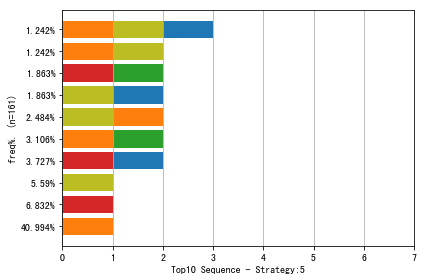

In [57]:
y = np.array(list_value)
sum_y = np.zeros(top)
x = range(top)


fig, ax = plt.subplots()
plt.barh(x, y[0],color = list_color[0])
for i in range(n-1):
    sum_y = sum_y + y[i]
    plt.barh(x, y[i+1], left = sum_y, color = list_color[i+1])
    
plt.xticks(range(0,8, 1))
list_bar = list(map(str, list((df['counts']*100).round(3)))) 
list_bar = [c+'%' for c in list_bar]
plt.yticks(range(top),list_bar)
plt.ylabel('freq%. (n='+str(m)+')')
plt.xlabel('Top10 Sequence - Strategy:'+str(clust+1))
plt.grid(axis="x")
plt.tight_layout()
plt.savefig('./image/Sequence_Vis/Strategy_top10_g='+str(clust+1), dpi=300)
plt.show()

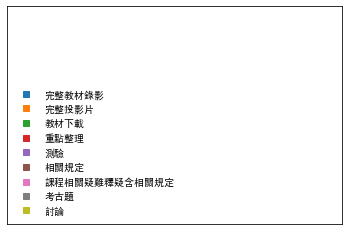

In [50]:
import numpy as np
import matplotlib.pyplot as plt

colors = my9color

f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colors[i]) for i in range(top-1)]
labels = cate
font = fm.FontProperties(fname=r'F:\Users\KSLab\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\SimHei.ttf'
                         , size=10)
legend = plt.legend(handles, labels, loc=3, framealpha=1, frameon=False, prop=font)
def export_legend(legend, filename="legend.png", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)
plt.grid(False)
frame = plt.gca()
frame.axes.get_yaxis().set_visible(False)
frame.axes.get_xaxis().set_visible(False)
plt.savefig('./image/legend_'+Substitution, dpi=300)
plt.show()


# Studen-Kmans

In [249]:
file_name = 'SP1081_10_17_final_chap'
data_name = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/sequence/'+ file_name +'.csv')

k = 2
#estimator = AgglomerativeClustering(n_clusters=k, affinity = 'precomputed', linkage= 'complete').fit(X)
estimator = AgglomerativeClustering(n_clusters=k, affinity = 'euclidean', linkage= 'ward').fit(X)

df = pd.DataFrame(columns= ['Students', 'label'])        
df['Students'] = data_name['0']
df['label'] = estimator.labels_
df = df.groupby(['Students', 'label']).size().reset_index(name='Count')
df = df.pivot(index='Students', columns='label', values='Count').reset_index()
df.fillna(0,inplace = True)
for i in range(k):
    df.rename(columns={i: 'seq.clust' + str(i)},inplace = True)

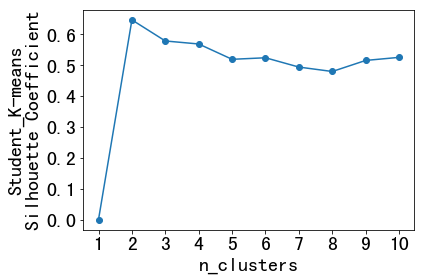

In [251]:
#silhouette_score

name = 'embedding_vector_'

min_c = 2
max_c = 10

Scores = [0]

X = df.drop('Students', axis=1)
X = np.array(X)


for k in range(min_c ,max_c+1):
    estimator = KMeans(n_clusters=k, random_state=0).fit(X)
    Scores.append(silhouette_score(X, estimator.labels_, metric='euclidean'))

    
    

    
x_axis = range(min_c-1, max_c+1, 1)
plt.xlabel('n_clusters',fontsize=20)
plt.ylabel('Student_K-means\nSilhouette Coefficient',fontsize=20)
plt.xticks(x_axis,fontsize=20)
plt.yticks(fontsize=20)
plt.plot(x_axis, Scores, 'o-')
plt.tight_layout()
plt.savefig('./image/Silhouette_Coefficient/'+name+'Kmeans', dpi=300)
plt.show()

In [261]:
# Step4. Calculate feature Count the number of sequences students have in each cluster and result
k = 2
estimator = KMeans(n_clusters=2, random_state=0).fit(X)
estimator.labels_
df['kmeans_group'] = estimator.labels_
data_scoreA = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/10811225甲班SP分數_final_結果.csv',encoding = "big5")
data_scoreB = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/10811225乙班SP分數_final_結果.csv',encoding = "big5")
df_score = data_scoreA.append(data_scoreB)


data_scoreA_ = pd.read_excel(r'C:/Users/KSLab/Google 雲端硬碟/中原/1081SP_甲班總成績.xlsx',encoding = "big5")
data_scoreB_ = pd.read_excel(r'C:/Users/KSLab/Google 雲端硬碟/中原/1081SP_乙班總成績.xlsx',encoding = "big5")
df_score_ = data_scoreA_.append(data_scoreB_)


df_result = pd.merge(df, df_score,how='left', left_on='Students', right_on='學號')
df_result = pd.merge(df_result, df_score_,how='left', left_on='Students', right_on='學號')


clust_col = ['Students', 'kmeans_group', '作業繳交次數', '測驗平均分數', '期中考(30%)', '期末考(30%)']


for i in range(k-1,-1,-1): 
    clust_col.insert(1,'seq.clust'+str(i))

df_result = df_result[clust_col]

df_result.to_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/'+name+'feature_table.csv',encoding = "big5", index = False)


C:\Users\KSLab\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [262]:
#Step5. Student’s sequences Clustering Input : Student’s sequences feature Method : K-means Clustering 

col = df_result.drop(columns = ['Students','kmeans_group']).columns.tolist()
col.insert(0,'cluster')
col.append('# of Students')


df_kmeans = pd.DataFrame(columns = col)
clust = []
for i in range(k): 
    clust.append('Class'+str(i))
clust.append('Means')

df_kmeans['cluster'] = clust
for col_ in col[1:-1]:
    for i in range(k):
        df_kmeans[col_][i] = df_result[df_result['kmeans_group'] == i][col_].mean()
        df_kmeans['# of Students'][i] = len(df_result[df_result['kmeans_group'] == i])
        
    df_kmeans[col_][k] = df_result[col_].mean()
    
        
df_kmeans.to_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/'+name+'result.csv',encoding = "big5", index = False)

# Find the Spearman correlation between educational theory and identified sequences feature


In [6]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math

from matplotlib.font_manager import FontProperties 

import matplotlib.font_manager as fm
font = fm.FontProperties(fname=r'F:\Users\KSLab\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\SimHei.ttf', size=20)

115


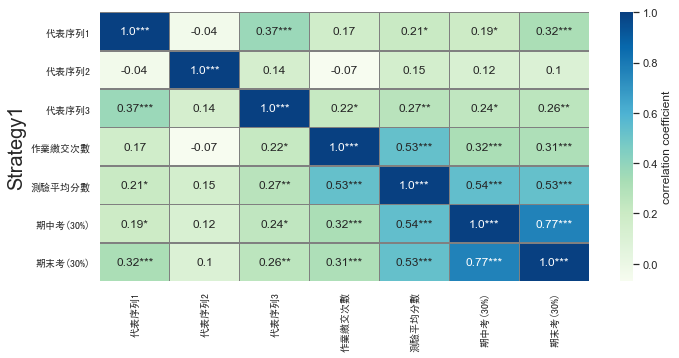

In [140]:
file_name = 'SP1081_10_17_final_chap'
data = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/sequence/' + file_name + '.csv')
Strategy = 0
estimator = AgglomerativeClustering(n_clusters=5, affinity = 'precomputed', linkage= 'complete').fit(X)
mask_s  = (estimator.labels_ == Strategy)

#完整教材錄影  (序列長度為1)
tmp_mask1  = (data['1'] == '完整教材錄影')
tmp_mask2  = (pd.isnull(data['2']))
mask1 = mask_s&tmp_mask1&tmp_mask2

#完整教材錄影>PPT  (序列長度為2)
tmp_mask1  = (data['1'] == '完整教材錄影')
tmp_mask2  = (data['2'] == '完整投影片')
tmp_mask3  = (pd.isnull(data['3']))
mask2 = mask_s&tmp_mask1&tmp_mask2&tmp_mask3

#完整教材錄影>PPT/或其他(=全部?)>完整教材錄影 (序列長度為3或是以上)

tmp_mask1  = (data['1'] == '完整教材錄影')
tmp_mask2  = (data['3'] == '完整教材錄影')
mask3 = mask_s&tmp_mask1&tmp_mask2


df1 = data[mask1]
df1 = df1.groupby(['0']).size().reset_index(name='Count')
df1.columns = ['學號','代表序列1']

df2 = data[mask2]
df2 = df2.groupby(['0']).size().reset_index(name='Count')
df2.columns = ['學號','代表序列2']

df3 = data[mask3]
df3 = df3.groupby(['0']).size().reset_index(name='Count')
df3.columns = ['學號','代表序列3']

df_result = pd.merge(df1, df2,how='outer', left_on='學號', right_on='學號')
df_result = pd.merge(df_result, df3,how='outer', left_on='學號', right_on='學號')


df = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/LCP_complete_feature_table.csv',encoding = "big5")
df_result = pd.merge(df_result, df,how='outer', left_on='學號', right_on='Students')
df_result.dropna(subset=['期末考(30%)'], inplace=True)
df_result.fillna(0, inplace=True)
df_result = df_result[['代表序列1', '代表序列2', '代表序列3','作業繳交次數','測驗平均分數', '期中考(30%)', '期末考(30%)']]
print(len(df_result))

data = df_result
data.dropna(inplace=True)

cor = data.corr(method = 'spearman').round(2)
label = data.corr(method = 'spearman').round(2)
# {‘pearson’, ‘kendall’, ‘spearman’,'wilcoxon'}

m, n = label.shape
for col in range(m):
    for row in range(n):
        r,p = stats.spearmanr(data.iloc[:,col], data.iloc[:,row])
        if p < 0.05 and p >= 0.01:   
            label.iloc[col,row] = str(r.round(2)) + '*'
            cor.iloc[col,row] = r.round(2)
        elif p < 0.01 and p >= 0.001:
            label.iloc[col,row] = str(r.round(2)) + '**'
            cor.iloc[col,row] = r.round(2)
        elif p <0.001:
            label.iloc[col,row] = str(r.round(2)) + '***'
            cor.iloc[col,row] = r.round(2)
        else:
            cor.iloc[col,row] = r.round(2)
            continue
            

fig1, ax1 = plt.subplots(figsize=(10, 5))
sns.set()

ax1 = sns.heatmap(cor,
                  cbar_kws={'label': 'correlation coefficient'}, 
                  cmap='GnBu', 
                  linewidths=0.5, 
                  linecolor='gray', annot=label, fmt="")


sns.set(font_scale=0.6)
ax1.set_ylabel('Strategy'+str(Strategy+1), fontsize = 20)

ax1.set_yticklabels(ax1.get_xticklabels(), rotation=0, fontsize = 15, fontproperties = font)

ax1.set_xticklabels(ax1.get_xticklabels(), fontsize = 15,rotation =90, fontproperties = font)

fig1.tight_layout()
#plt.savefig('./image/Corr/Strategy'+str(Strategy+1)+'_spearmanr.png', dpi=300)

115


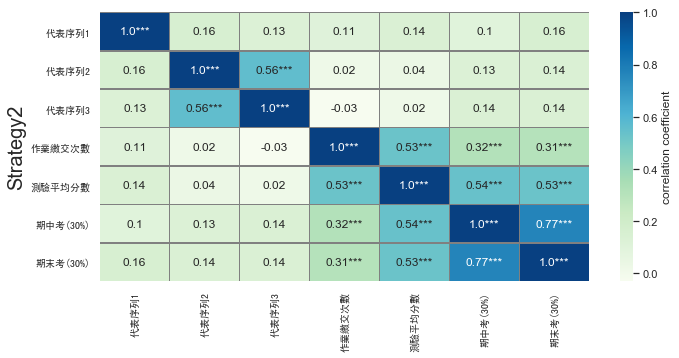

In [141]:
file_name = 'SP1081_10_17_final_chap'
data = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/sequence/' + file_name + '.csv')
Strategy = 1
estimator = AgglomerativeClustering(n_clusters=5, affinity = 'precomputed', linkage= 'complete').fit(X)
mask_s  = (estimator.labels_ == Strategy)

#完整投影片>完整教材錄影 (序列長度為2)
tmp_mask1  = (data['1'] == '完整投影片')
tmp_mask2  = (data['2'] == '完整教材錄影')
tmp_mask3  = (pd.isnull(data['3']))
mask1 = mask_s&tmp_mask1&tmp_mask2&tmp_mask3

#完整投影片>完整教材錄影>完整投影片  (序列長度為3)
tmp_mask1  = (data['1'] == '完整投影片')
tmp_mask2  = (data['2'] == '完整教材錄影')
tmp_mask3  = (data['3'] == '完整投影片')
tmp_mask4  = (pd.isnull(data['4']))
mask2 = mask_s&tmp_mask1&tmp_mask2&tmp_mask3&tmp_mask4

#完整投影片>完整教材錄影>其他  (序列長度為3或是以上)
tmp_mask1  = (data['1'] == '完整投影片')
tmp_mask2  = (data['2'] == '完整教材錄影')
tmp_mask3  = ~(pd.isnull(data['3']))
mask3 = mask_s&tmp_mask1&tmp_mask2&tmp_mask3


df1 = data[mask1]
df1 = df1.groupby(['0']).size().reset_index(name='Count')
df1.columns = ['學號','代表序列1']

df2 = data[mask2]
df2 = df2.groupby(['0']).size().reset_index(name='Count')
df2.columns = ['學號','代表序列2']

df3 = data[mask3]
df3 = df3.groupby(['0']).size().reset_index(name='Count')
df3.columns = ['學號','代表序列3']

df_result = pd.merge(df1, df2,how='outer', left_on='學號', right_on='學號')
df_result = pd.merge(df_result, df3,how='outer', left_on='學號', right_on='學號')


df = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/LCP_complete_feature_table.csv',encoding = "big5")
df_result = pd.merge(df_result, df,how='outer', left_on='學號', right_on='Students')
df_result.dropna(subset=['期末考(30%)'], inplace=True)
df_result.fillna(0, inplace=True)
df_result = df_result[['代表序列1', '代表序列2', '代表序列3','作業繳交次數','測驗平均分數', '期中考(30%)', '期末考(30%)']]
print(len(df_result))


data = df_result
data.dropna(inplace=True)

cor = data.corr(method = 'spearman').round(2)
label = data.corr(method = 'spearman').round(2)
# {‘pearson’, ‘kendall’, ‘spearman’,'wilcoxon'}

m, n = label.shape
for col in range(m):
    for row in range(n):
        r,p = stats.spearmanr(data.iloc[:,col], data.iloc[:,row])
        if p < 0.05 and p >= 0.01:   
            label.iloc[col,row] = str(r.round(2)) + '*'
            cor.iloc[col,row] = r.round(2)
        elif p < 0.01 and p >= 0.001:
            label.iloc[col,row] = str(r.round(2)) + '**'
            cor.iloc[col,row] = r.round(2)
        elif p <0.001:
            label.iloc[col,row] = str(r.round(2)) + '***'
            cor.iloc[col,row] = r.round(2)
        else:
            cor.iloc[col,row] = r.round(2)
            continue
            

fig1, ax1 = plt.subplots(figsize=(10, 5))
sns.set()

ax1 = sns.heatmap(cor,
                  cbar_kws={'label': 'correlation coefficient'}, 
                  cmap='GnBu', 
                  linewidths=0.5, 
                  linecolor='gray', annot=label, fmt="")


sns.set(font_scale=0.6)
ax1.set_ylabel('Strategy'+str(Strategy+1), fontsize = 20)

ax1.set_yticklabels(ax1.get_xticklabels(), rotation=0, fontsize = 15, fontproperties = font)

ax1.set_xticklabels(ax1.get_xticklabels(), fontsize = 15,rotation =90, fontproperties = font)

fig1.tight_layout()
#plt.savefig('./image/Corr/Strategy'+str(Strategy+1)+'_spearmanr.png', dpi=300)

115


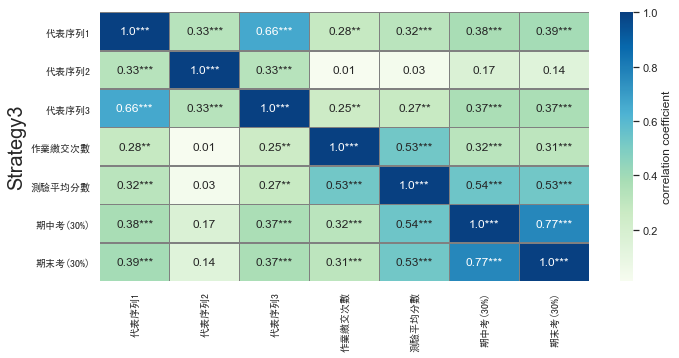

In [142]:
file_name = 'SP1081_10_17_final_chap'
data = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/sequence/' + file_name + '.csv')
Strategy = 2
estimator = AgglomerativeClustering(n_clusters=5, affinity = 'precomputed', linkage= 'complete').fit(X)
mask_s  = (estimator.labels_ == Strategy)

#教材下載  (序列長度為1)
tmp_mask1  = (data['1'] == '教材下載')
tmp_mask2  = (pd.isnull(data['2']))
mask1 = mask_s&tmp_mask1&tmp_mask2

#教材下載>完整投影片  (序列長度為2或以上)
tmp_mask1  = (data['1'] == '教材下載')
tmp_mask2  = (data['2'] == '完整投影片')
mask2 = mask_s&tmp_mask1&tmp_mask2

#教材下載>完整教材錄影  (序列長度為2或以上)
tmp_mask1  = (data['1'] == '教材下載')
tmp_mask2  = (data['2'] == '完整教材錄影')
mask3 = mask_s&tmp_mask1&tmp_mask2


df1 = data[mask1]
df1 = df1.groupby(['0']).size().reset_index(name='Count')
df1.columns = ['學號','代表序列1']

df2 = data[mask2]
df2 = df2.groupby(['0']).size().reset_index(name='Count')
df2.columns = ['學號','代表序列2']

df3 = data[mask3]
df3 = df3.groupby(['0']).size().reset_index(name='Count')
df3.columns = ['學號','代表序列3']

df_result = pd.merge(df1, df2,how='outer', left_on='學號', right_on='學號')
df_result = pd.merge(df_result, df3,how='outer', left_on='學號', right_on='學號')


df = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/LCP_complete_feature_table.csv',encoding = "big5")
df_result = pd.merge(df_result, df,how='outer', left_on='學號', right_on='Students')
df_result.dropna(subset=['期末考(30%)'], inplace=True)
df_result.fillna(0, inplace=True)
df_result = df_result[['代表序列1', '代表序列2', '代表序列3','作業繳交次數','測驗平均分數', '期中考(30%)', '期末考(30%)']]
print(len(df_result))


data = df_result
data.dropna(inplace=True)

cor = data.corr(method = 'spearman').round(2)
label = data.corr(method = 'spearman').round(2)
# {‘pearson’, ‘kendall’, ‘spearman’,'wilcoxon'}

m, n = label.shape
for col in range(m):
    for row in range(n):
        r,p = stats.spearmanr(data.iloc[:,col], data.iloc[:,row])
        if p < 0.05 and p >= 0.01:   
            label.iloc[col,row] = str(r.round(2)) + '*'
            cor.iloc[col,row] = r.round(2)
        elif p < 0.01 and p >= 0.001:
            label.iloc[col,row] = str(r.round(2)) + '**'
            cor.iloc[col,row] = r.round(2)
        elif p <0.001:
            label.iloc[col,row] = str(r.round(2)) + '***'
            cor.iloc[col,row] = r.round(2)
        else:
            cor.iloc[col,row] = r.round(2)
            continue
            

fig1, ax1 = plt.subplots(figsize=(10, 5))
sns.set()

ax1 = sns.heatmap(cor,
                  cbar_kws={'label': 'correlation coefficient'}, 
                  cmap='GnBu', 
                  linewidths=0.5, 
                  linecolor='gray', annot=label, fmt="")


sns.set(font_scale=0.6)
ax1.set_ylabel('Strategy'+str(Strategy+1), fontsize = 20)

ax1.set_yticklabels(ax1.get_xticklabels(), rotation=0, fontsize = 15, fontproperties = font)

ax1.set_xticklabels(ax1.get_xticklabels(), fontsize = 15,rotation =90, fontproperties = font)

fig1.tight_layout()
#plt.savefig('./image/Corr/Strategy'+str(Strategy+1)+'_spearmanr.png', dpi=300)

88
    代表序列1  代表序列2  代表序列3  作業繳交次數  測驗平均分數  期中考(30%)  期末考(30%)  前測認知負荷  後測認知負荷  \
0     1.0    0.0    0.0     2.0    22.0      85.0      58.0    31.0    32.0   
1     1.0    0.0    1.0     3.0    42.0      75.0      55.0    30.0    35.0   
2     1.0    1.0    0.0     2.0    19.0      43.0      40.0    48.0    32.0   
3     1.0    1.0    0.0     2.0    33.0      68.0      35.0    39.0    31.0   
6     0.0    1.0    0.0     3.0    31.0      55.0      60.0    35.0    32.0   
7     0.0    1.0    0.0     2.0    33.0      83.0      45.0    33.0    33.0   
8     0.0    1.0    0.0     1.0    42.0      83.0      80.0    41.0    48.0   
9     0.0    1.0    0.0     1.0    14.0      65.0      48.0    32.0    31.0   
10    0.0    1.0    0.0     3.0    15.0      25.0      18.0    27.0    34.0   
12    0.0    0.0    1.0     3.0    49.0      80.0      63.0    35.0    33.0   
16    0.0    0.0    0.0     3.0     0.0      53.0      28.0    48.0    48.0   
17    0.0    0.0    0.0     0.0     0.0      38.0

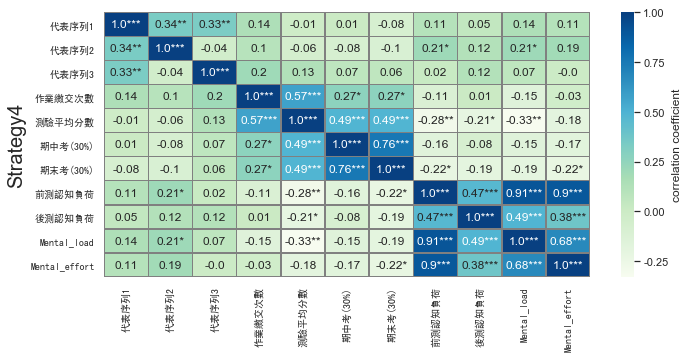

In [150]:
file_name = 'SP1081_10_17_final_chap'
data = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/sequence/' + file_name + '.csv')
Strategy = 3
estimator = AgglomerativeClustering(n_clusters=5, affinity = 'precomputed', linkage= 'complete').fit(X)
mask_s  = (estimator.labels_ == Strategy)

#考古題  (序列長度為1)
tmp_mask1  = (data['1'] == '考古題')
tmp_mask2  = (pd.isnull(data['2']))
mask1 = mask_s&tmp_mask1&tmp_mask2

#考古題>完整教材錄影  (序列長度為2或以上)

tmp_mask1  = (data['1'] == '考古題')
tmp_mask2  = (data['2'] == '完整教材錄影')
mask2 = mask_s&tmp_mask1&tmp_mask2

#考古題>完整投影片 (序列長度為2或以上)
tmp_mask1  = (data['1'] == '考古題')
tmp_mask2  = (data['2'] == '完整投影片')
mask3 = mask_s&tmp_mask1&tmp_mask2


df1 = data[mask1]
df1 = df1.groupby(['0']).size().reset_index(name='Count')
df1.columns = ['學號','代表序列1']

df2 = data[mask2]
df2 = df2.groupby(['0']).size().reset_index(name='Count')
df2.columns = ['學號','代表序列2']

df3 = data[mask3]
df3 = df3.groupby(['0']).size().reset_index(name='Count')
df3.columns = ['學號','代表序列3']

df_result = pd.merge(df1, df2,how='outer', left_on='學號', right_on='學號')
df_result = pd.merge(df_result, df3,how='outer', left_on='學號', right_on='學號')

qn = pd.read_excel(r'C:/Users/KSLab/Google 雲端硬碟/中原/實驗數據.xlsx')
qn['Mental_load'] = (qn['前測認知負荷1'] + qn['前測認知負荷2'] + qn['前測認知負荷3'] 
+ qn['前測認知負荷4'] + qn['前測認知負荷5'])/5

qn['Mental_effort'] = (qn['前測認知負荷6'] + qn['前測認知負荷7'] + qn['前測認知負荷8'])/3
qn = qn[['學號','前測認知負荷','後測認知負荷','Mental_load','Mental_effort']]
df_result = pd.merge(df_result, qn, how='outer', left_on='學號', right_on='學號')


df = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/LCP_complete_feature_table.csv',encoding = "big5")
df_result = pd.merge(df_result, df,how='outer', left_on='學號', right_on='Students')

df_result.dropna(subset=['期末考(30%)','Mental_effort'], inplace=True)
df_result.fillna(0, inplace=True)
df_result = df_result[['代表序列1', '代表序列2', '代表序列3','作業繳交次數','測驗平均分數', '期中考(30%)', '期末考(30%)','前測認知負荷','後測認知負荷','Mental_load','Mental_effort']]
print(len(df_result))
print((df_result))


data = df_result
data.dropna(inplace=True)

cor = data.corr(method = 'spearman').round(2)
label = data.corr(method = 'spearman').round(2)
# {‘pearson’, ‘kendall’, ‘spearman’,'wilcoxon'}

m, n = label.shape
for col in range(m):
    for row in range(n):
        r,p = stats.spearmanr(data.iloc[:,col], data.iloc[:,row])
        if p < 0.05 and p >= 0.01:   
            label.iloc[col,row] = str(r.round(2)) + '*'
            cor.iloc[col,row] = r.round(2)
        elif p < 0.01 and p >= 0.001:
            label.iloc[col,row] = str(r.round(2)) + '**'
            cor.iloc[col,row] = r.round(2)
        elif p <0.001:
            label.iloc[col,row] = str(r.round(2)) + '***'
            cor.iloc[col,row] = r.round(2)
        else:
            cor.iloc[col,row] = r.round(2)
            continue
            

fig1, ax1 = plt.subplots(figsize=(10, 5))
sns.set()

ax1 = sns.heatmap(cor,
                  cbar_kws={'label': 'correlation coefficient'}, 
                  cmap='GnBu', 
                  linewidths=0.5, 
                  linecolor='gray', annot=label, fmt="")


sns.set(font_scale=0.6)
ax1.set_ylabel('Strategy'+str(Strategy+1), fontsize = 20)

ax1.set_yticklabels(ax1.get_xticklabels(), rotation=0, fontsize = 15, fontproperties = font)

ax1.set_xticklabels(ax1.get_xticklabels(), fontsize = 15,rotation =90, fontproperties = font)

fig1.tight_layout()
#plt.savefig('./image/Corr/Strategy'+str(Strategy+1)+'_spearmanr.png', dpi=300)

115


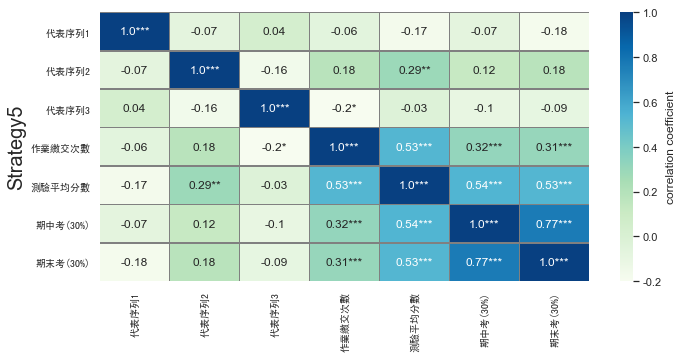

In [146]:
file_name = 'SP1081_10_17_final_chap'
data = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/sequence/' + file_name + '.csv')
Strategy = 4
estimator = AgglomerativeClustering(n_clusters=5, affinity = 'precomputed', linkage= 'complete').fit(X)
mask_s  = (estimator.labels_ == Strategy)

#完整投影片>其他  (序列長度為1或以上)
tmp_mask1  = (data['1'] == '完整投影片')
mask1 = mask_s&tmp_mask1

#討論>其他   (序列長度為1或以上)
tmp_mask1  = (data['1'] == '討論')
mask2 = mask_s&tmp_mask1

#重點整理影片>其他   (序列長度為1或以上)
tmp_mask1  = (data['1'] == '重點整理')
mask3 = mask_s&tmp_mask1


df1 = data[mask1]
df1 = df1.groupby(['0']).size().reset_index(name='Count')
df1.columns = ['學號','代表序列1']

df2 = data[mask2]
df2 = df2.groupby(['0']).size().reset_index(name='Count')
df2.columns = ['學號','代表序列2']

df3 = data[mask3]
df3 = df3.groupby(['0']).size().reset_index(name='Count')
df3.columns = ['學號','代表序列3']

df_result = pd.merge(df1, df2,how='outer', left_on='學號', right_on='學號')
df_result = pd.merge(df_result, df3,how='outer', left_on='學號', right_on='學號')


df = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/LCP_complete_feature_table.csv',encoding = "big5")
df_result = pd.merge(df_result, df,how='outer', left_on='學號', right_on='Students')
df_result.dropna(subset=['期末考(30%)'], inplace=True)
df_result.fillna(0, inplace=True)
df_result = df_result[['代表序列1', '代表序列2', '代表序列3','作業繳交次數','測驗平均分數', '期中考(30%)', '期末考(30%)']]
print(len(df_result))


data = df_result
data.dropna(inplace=True)

cor = data.corr(method = 'spearman').round(2)
label = data.corr(method = 'spearman').round(2)
# {‘pearson’, ‘kendall’, ‘spearman’,'wilcoxon'}

m, n = label.shape
for col in range(m):
    for row in range(n):
        r,p = stats.spearmanr(data.iloc[:,col], data.iloc[:,row])
        if p < 0.05 and p >= 0.01:   
            label.iloc[col,row] = str(r.round(2)) + '*'
            cor.iloc[col,row] = r.round(2)
        elif p < 0.01 and p >= 0.001:
            label.iloc[col,row] = str(r.round(2)) + '**'
            cor.iloc[col,row] = r.round(2)
        elif p <0.001:
            label.iloc[col,row] = str(r.round(2)) + '***'
            cor.iloc[col,row] = r.round(2)
        else:
            cor.iloc[col,row] = r.round(2)
            continue
            

fig1, ax1 = plt.subplots(figsize=(10, 5))
sns.set()

ax1 = sns.heatmap(cor,
                  cbar_kws={'label': 'correlation coefficient'}, 
                  cmap='GnBu', 
                  linewidths=0.5, 
                  linecolor='gray', annot=label, fmt="")


sns.set(font_scale=0.6)
ax1.set_ylabel('Strategy'+str(Strategy+1), fontsize = 20)

ax1.set_yticklabels(ax1.get_xticklabels(), rotation=0, fontsize = 15, fontproperties = font)

ax1.set_xticklabels(ax1.get_xticklabels(), fontsize = 15,rotation =90, fontproperties = font)

fig1.tight_layout()
#plt.savefig('./image/Corr/Strategy'+str(Strategy+1)+'_spearmanr.png', dpi=300)

116


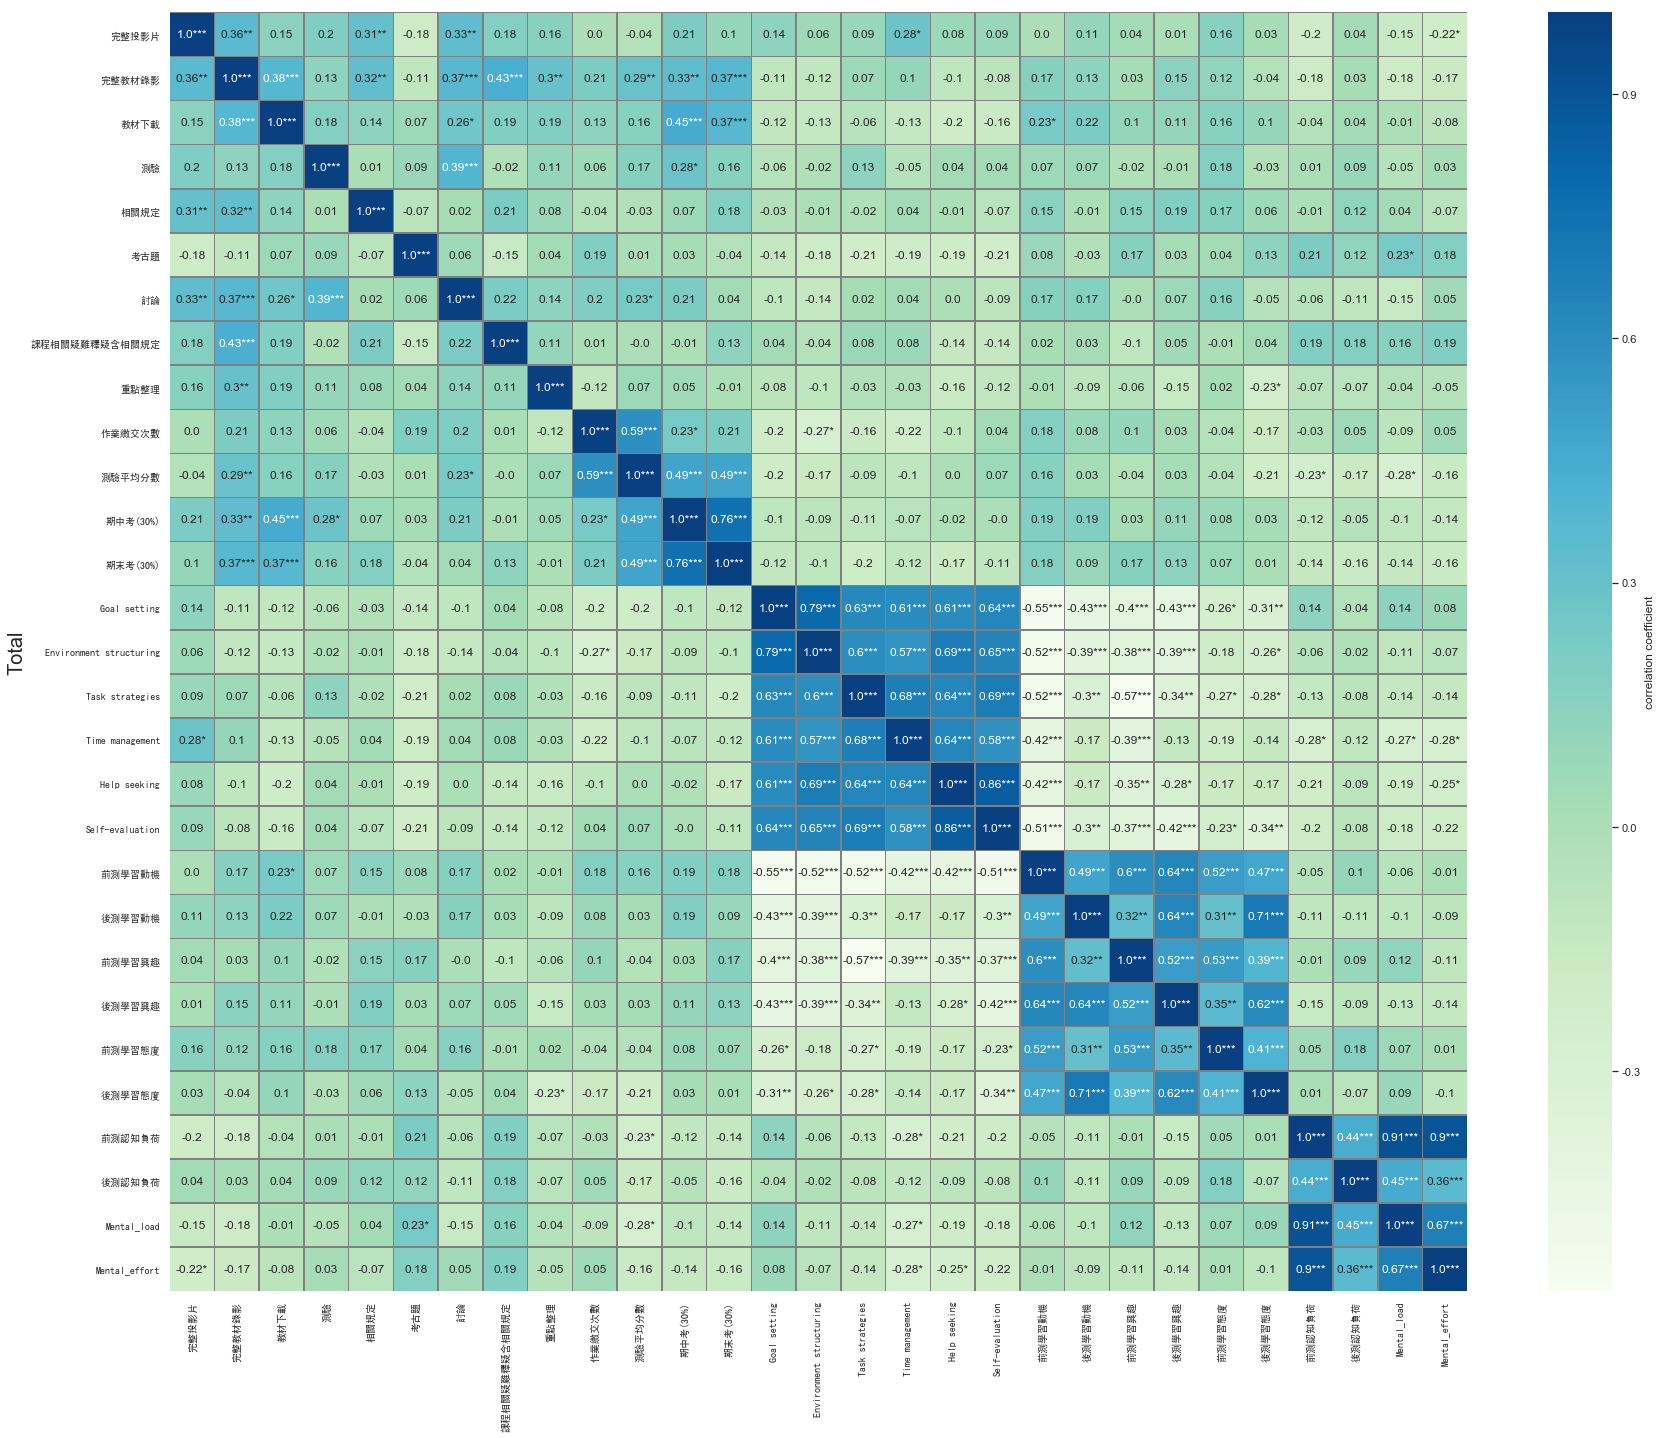

In [138]:
file_name = 'SP1081_10_17_final_chap'
data = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/sequence/' + file_name + '.csv')
#Strategy = 4
#estimator = AgglomerativeClustering(n_clusters=5, affinity = 'precomputed', linkage= 'complete').fit(X)
#mask  = (estimator.labels_ == Strategy)
#data_mask = data[mask]
data_mask = data

df_cate = pd.DataFrame(columns= ['學號','cate'])
for i in range(1,8):
    df2 = data_mask[['0',str(i)]]
    df2.columns = ['學號','cate']
    df_cate = df_cate.append(df2)

df_cate = df_cate.groupby(['學號', 'cate']).size().reset_index(name='Count')
df_cate = df_cate.pivot(index='學號', columns= 'cate', values='Count').reset_index()
df_cate.fillna(0, inplace = True)



SRL = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/1081SP_中原SRL前測.csv')
SRL.dropna(inplace = True)
SRL['Goal setting'] = (SRL['1']+SRL['2']+SRL['3']+SRL['4']+SRL['5']) / 5
SRL['Environment structuring'] = (SRL['6']+SRL['7']+SRL['8']+SRL['9']) / 4
SRL['Task strategies'] = (SRL['10']+SRL['11']+SRL['12']+SRL['13']) / 4
SRL['Time management'] = (SRL['14']+SRL['15']+SRL['16']) / 3
SRL['Help seeking'] = (SRL['17']+SRL['18']+SRL['19']+SRL['20']) / 4
SRL['Self-evaluation'] = (SRL['21']+SRL['22']+SRL['23']+SRL['24']) / 4
SRL = SRL[['學號','Goal setting','Environment structuring','Task strategies'
           ,'Time management','Help seeking','Self-evaluation']]


qn = pd.read_excel(r'C:/Users/KSLab/Google 雲端硬碟/中原/實驗數據.xlsx')
qn['Mental_load'] = (qn['前測認知負荷1'] + qn['前測認知負荷2'] + qn['前測認知負荷3'] 
+ qn['前測認知負荷4'] + qn['前測認知負荷5'])/5

qn['Mental_effort'] = (qn['前測認知負荷6'] + qn['前測認知負荷7'] + qn['前測認知負荷8'])/3
qn = qn[['學號','前測學習動機','後測學習動機','前測學習興趣','後測學習興趣','前測學習態度','後測學習態度',
         '前測認知負荷','後測認知負荷','Mental_load','Mental_effort']]

name = 'LCP_complete_'

df_result = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/'+name+'feature_table.csv',encoding = "big5")
df_result = pd.merge(df_result, df_cate,how='left', left_on='Students', right_on='學號')
df_result = pd.merge(df_result, SRL,how='left', left_on='Students', right_on='學號')
df_result = pd.merge(df_result, qn,how='left', left_on='Students', right_on='學號')
df_result = df_result[['完整投影片', '完整教材錄影', '教材下載','測驗'
       ,'相關規定','考古題', '討論', '課程相關疑難釋疑含相關規定', '重點整理'
       ,'作業繳交次數','測驗平均分數', '期中考(30%)', '期末考(30%)'
       ,'Goal setting','Environment structuring', 'Task strategies', 'Time management','Help seeking', 'Self-evaluation'
       ,'前測學習動機', '後測學習動機', '前測學習興趣','後測學習興趣', '前測學習態度', '後測學習態度'
       ,'前測認知負荷', '後測認知負荷', 'Mental_load','Mental_effort']]
data = df_result
data.dropna(inplace=True)

cor = data.corr(method = 'spearman').round(2)
label = data.corr(method = 'spearman').round(2)
# {‘pearson’, ‘kendall’, ‘spearman’,'wilcoxon'}

m, n = label.shape
for col in range(m):
    for row in range(n):
        r,p = stats.spearmanr(data.iloc[:,col], data.iloc[:,row])
        if p < 0.05 and p >= 0.01:   
            label.iloc[col,row] = str(r.round(2)) + '*'
            cor.iloc[col,row] = r.round(2)
        elif p < 0.01 and p >= 0.001:
            label.iloc[col,row] = str(r.round(2)) + '**'
            cor.iloc[col,row] = r.round(2)
        elif p <0.001:
            label.iloc[col,row] = str(r.round(2)) + '***'
            cor.iloc[col,row] = r.round(2)
        else:
            cor.iloc[col,row] = r.round(2)
            continue
            

fig1, ax1 = plt.subplots(figsize=(25, 20))
sns.set()

ax1 = sns.heatmap(cor,
                  cbar_kws={'label': 'correlation coefficient'}, 
                  cmap='GnBu', 
                  linewidths=0.5, 
                  linecolor='gray', annot=label, fmt="")


sns.set(font_scale=0.6)
#ax1.set_ylabel('Strategy'+str(Strategy+1), fontsize = 20)
ax1.set_ylabel('Total', fontsize = 20)

ax1.set_yticklabels(ax1.get_xticklabels(), rotation=0, fontsize = 15, fontproperties = font)

ax1.set_xticklabels(ax1.get_xticklabels(), fontsize = 15,rotation =90, fontproperties = font)

fig1.tight_layout()
#plt.savefig('./image/Corr/Strategy'+str(Strategy+1)+'_spearmanr.png', dpi=300)
plt.savefig('./image/Corr/Total_spearmanr.png', dpi=300)

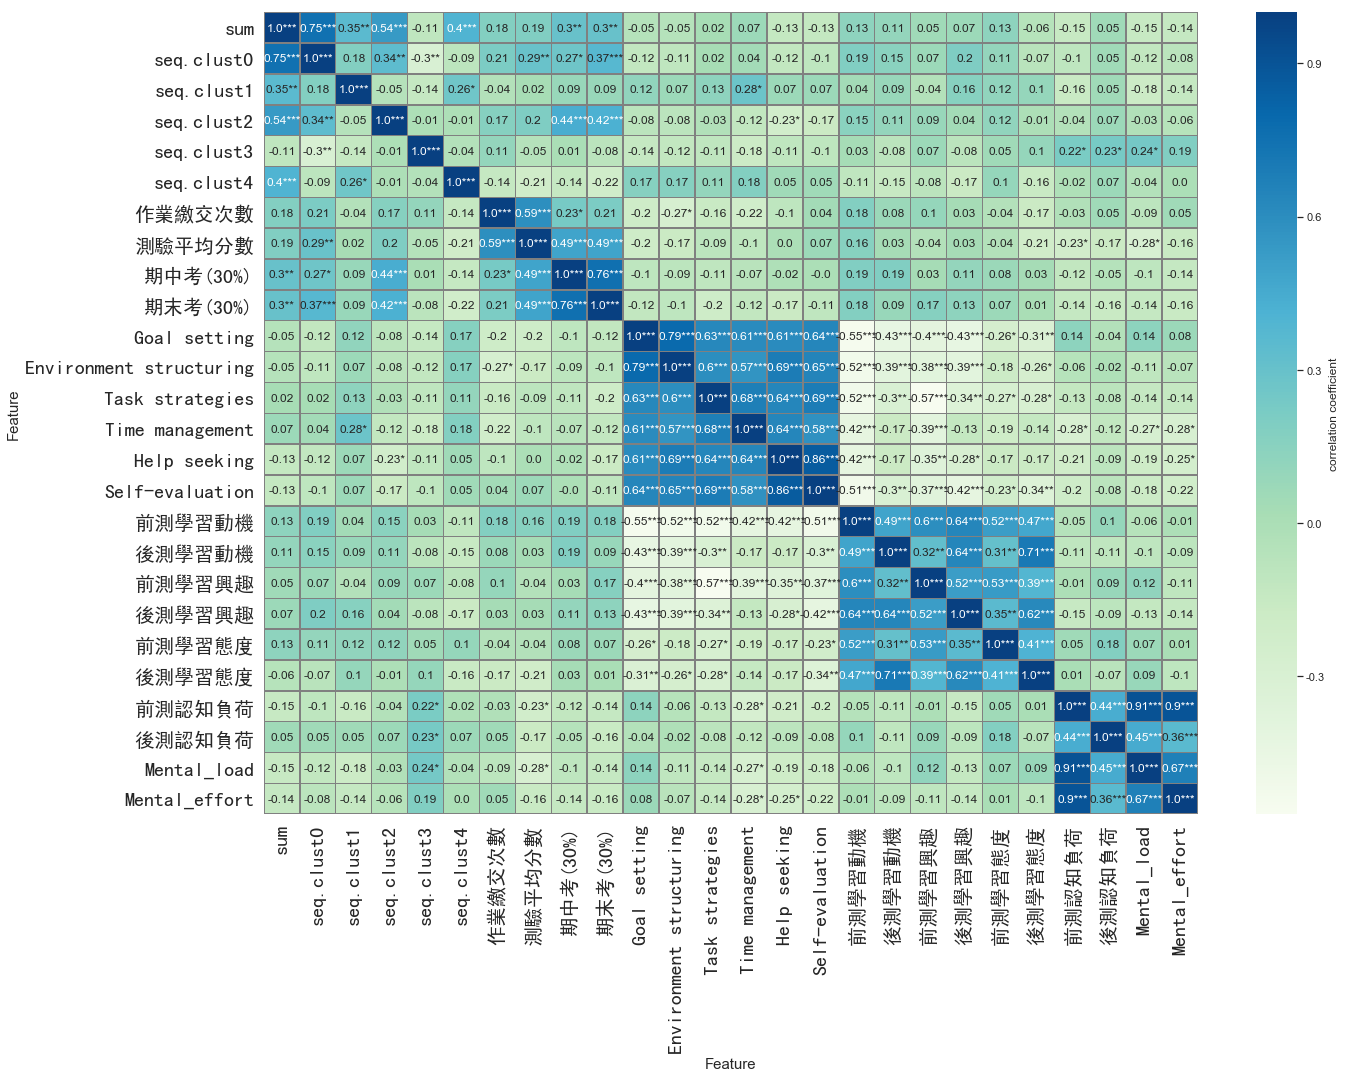

In [117]:
SRL = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/1081SP_中原SRL前測.csv')
SRL.dropna(inplace = True)
SRL['Goal setting'] = (SRL['1']+SRL['2']+SRL['3']+SRL['4']+SRL['5']) / 5
SRL['Environment structuring'] = (SRL['6']+SRL['7']+SRL['8']+SRL['9']) / 4
SRL['Task strategies'] = (SRL['10']+SRL['11']+SRL['12']+SRL['13']) / 4
SRL['Time management'] = (SRL['14']+SRL['15']+SRL['16']) / 3
SRL['Help seeking'] = (SRL['17']+SRL['18']+SRL['19']+SRL['20']) / 4
SRL['Self-evaluation'] = (SRL['21']+SRL['22']+SRL['23']+SRL['24']) / 4
SRL = SRL[['學號','Goal setting','Environment structuring','Task strategies'
           ,'Time management','Help seeking','Self-evaluation']]


qn = pd.read_excel(r'C:/Users/KSLab/Google 雲端硬碟/中原/實驗數據.xlsx')
qn['Mental_load'] = (qn['前測認知負荷1'] + qn['前測認知負荷2'] + qn['前測認知負荷3'] 
+ qn['前測認知負荷4'] + qn['前測認知負荷5'])/5

qn['Mental_effort'] = (qn['前測認知負荷6'] + qn['前測認知負荷7'] + qn['前測認知負荷8'])/3
qn = qn[['學號','前測學習動機','後測學習動機','前測學習興趣','後測學習興趣','前測學習態度','後測學習態度',
         '前測認知負荷','後測認知負荷','Mental_load','Mental_effort']]

name = 'LCP_complete_'

df_result = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/'+name+'feature_table.csv',encoding = "big5")

df_result = pd.merge(df_result, SRL,how='left', left_on='Students', right_on='學號')
df_result = pd.merge(df_result, qn,how='left', left_on='Students', right_on='學號')
df_result = df_result.drop(['Students','學號_x','學號_y', 'kmeans_group'], axis=1)
df_result.insert(0,'sum',(df_result['seq.clust0'] +  df_result['seq.clust1']
                          +df_result['seq.clust2'] +  df_result['seq.clust3']+  df_result['seq.clust4']))



data = df_result
data.dropna(inplace=True)

cor = data.corr(method = 'spearman').round(2)
label = data.corr(method = 'spearman').round(2)
# {‘pearson’, ‘kendall’, ‘spearman’,'wilcoxon'}

m, n = label.shape
for col in range(m):
    for row in range(n):
        r,p = stats.spearmanr(data.iloc[:,col], data.iloc[:,row])
        if p < 0.05 and p >= 0.01:   
            label.iloc[col,row] = str(r.round(2)) + '*'
            cor.iloc[col,row] = r.round(2)
        elif p < 0.01 and p >= 0.001:
            label.iloc[col,row] = str(r.round(2)) + '**'
            cor.iloc[col,row] = r.round(2)
        elif p <0.001:
            label.iloc[col,row] = str(r.round(2)) + '***'
            cor.iloc[col,row] = r.round(2)
        else:
            cor.iloc[col,row] = r.round(2)
            continue
            

fig1, ax1 = plt.subplots(figsize=(20, 15))
sns.set()

ax1 = sns.heatmap(cor,
                  cbar_kws={'label': 'correlation coefficient'}, 
                  cmap='GnBu', 
                  linewidths=0.5, 
                  linecolor='gray', annot=label, fmt="")


sns.set(font_scale=0.6)
ax1.set_ylabel('Feature', fontsize = 15)
ax1.set_yticklabels(ax1.get_xticklabels(), rotation=0, fontsize = 15, fontproperties = font)

ax1.set_xlabel('Feature', fontsize = 15)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize = 15,rotation =90, fontproperties = font)

fig1.tight_layout()

plt.savefig('./image/Corr/'+name+'corr_spearmanr.png', dpi=300)

# Calculate the final exam t-test between recommended and non-recommended groups

In [28]:
#SRL
SRL = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/1081SP_中原SRL前測.csv')
SRL.dropna(inplace = True)
SRL['Goal setting'] = (SRL['1']+SRL['2']+SRL['3']+SRL['4']+SRL['5']) / 5
SRL['Environment structuring'] = (SRL['6']+SRL['7']+SRL['8']+SRL['9']) / 4
SRL['Task strategies'] = (SRL['10']+SRL['11']+SRL['12']+SRL['13']) / 4
SRL['Time management'] = (SRL['14']+SRL['15']+SRL['16']) / 3
SRL['Help seeking'] = (SRL['17']+SRL['18']+SRL['19']+SRL['20']) / 4
SRL['Self-evaluation'] = (SRL['21']+SRL['22']+SRL['23']+SRL['24']) / 4
#問卷
qn = pd.read_excel(r'C:/Users/KSLab/Google 雲端硬碟/中原/實驗數據.xlsx')
qn = qn.drop(columns=['姓名'])
#推薦組
df = pd.read_excel(r'C:\Users\KSLab\Google 雲端硬碟\2020 - SSCI - CAE (recommendation and motivation - 2, CYCU)\數據結果\中原_期末考推薦_資訊總表.xlsx',encoding = "big5")
df = df[['Students','推薦與否(0=不推薦, 1=推薦)']]


name = 'LCP_complete_'
df_result = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/'+name+'feature_table.csv',encoding = "big5")
df_result = pd.merge(df_result, SRL,how='left', left_on='Students', right_on='學號')
df_result = pd.merge(df_result, qn,how='left', left_on='Students', right_on='學號')
df_result = pd.merge(df_result, df,how='left', left_on='Students', right_on='Students')

df_result = df_result.drop(['學號_x', '姓名', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24','學號_y'], axis=1)
#df_result.dropna(subset = ['前測認知負荷'],inplace = True)
df_result.to_csv('中原_data.csv', index = False, encoding = 'big5')

df_result['Mental_load'] = (df_result['前測認知負荷1'] + df_result['前測認知負荷2'] + df_result['前測認知負荷3'] 
+ df_result['前測認知負荷4'] + df_result['前測認知負荷5'])/5

df_result['Mental_effort'] = (df_result['前測認知負荷6'] + df_result['前測認知負荷7'] + df_result['前測認知負荷8'])/3


df_result.columns

Index(['Students', 'seq.clust0', 'seq.clust1', 'seq.clust2', 'seq.clust3',
       'seq.clust4', 'kmeans_group', '作業繳交次數', '測驗平均分數', '期中考(30%)',
       '期末考(30%)', 'Goal setting', 'Environment structuring',
       'Task strategies', 'Time management', 'Help seeking', 'Self-evaluation',
       '前測學習動機', '後測學習動機', '前測學習興趣', '後測學習興趣', '前測學習態度', '後測學習態度', '前測認知負荷1',
       '前測認知負荷2', '前測認知負荷3', '前測認知負荷4', '前測認知負荷5', '前測認知負荷6', '前測認知負荷7',
       '前測認知負荷8', '前測認知負荷', '後測認知負荷1', '後測認知負荷2', '後測認知負荷3', '後測認知負荷4',
       '後測認知負荷5', '後測認知負荷6', '後測認知負荷7', '後測認知負荷8', '後測認知負荷',
       '推薦與否(0=不推薦, 1=推薦)', 'Mental_load', 'Mental_effort'],
      dtype='object')

In [30]:
df_result.columns
d1 = df_result[df_result['kmeans_group'] == 0]['Mental_effort'].dropna()
d2 = df_result[df_result['kmeans_group'] == 1]['Mental_effort'].dropna()
print(stats.mannwhitneyu(d1, d2))
print(d1.mean(), d2.mean())

MannwhitneyuResult(statistic=527.5, pvalue=0.14152354938352307)
3.925925925925927 4.052380952380953


In [285]:
com = df_result[df_result['kmeans_group'] == 1]

non_com = df_result[df_result['kmeans_group'] == 0]

t, p = stats.ttest_ind(com['期末考(30%)'].dropna(), non_com['期末考(30%)'].dropna())
print(t, p)
print(com['期末考(30%)'].dropna().mean(), non_com['期末考(30%)'].dropna().mean())
print(len(com['期末考(30%)'].dropna()), len(non_com['期末考(30%)'].dropna()))


-3.107409274603199 0.00238745777294619
47.51063829787234 63.857142857142854
94 21


In [265]:
X = df_result['前測認知負荷']
X = np.array(X).reshape(-1, 1)
estimator = KMeans(n_clusters=2, random_state=0).fit(X)
mask = (estimator.labels_ == 1)
print(df_result[mask]['前測認知負荷'].mean())
tmp = df_result[mask]
g_non_com = tmp[(tmp['kmeans_group'] == 1) & (tmp['推薦與否(0=不推薦, 1=推薦)'] == 0)]
g_com = tmp[(tmp['kmeans_group'] == 1) & (tmp['推薦與否(0=不推薦, 1=推薦)'] == 1)]

print('非推薦_期末考平均', g_non_com['期中考(30%)'].mean(),'人數 = ',len(g_non_com))
print('推薦_期末考平均', g_com['期中考(30%)'].mean(),'人數 = ',len(g_com))
t, p = stats.ttest_ind(g_com['前測認知負荷'], g_non_com['前測認知負荷'])
print(t, p)

38.857142857142854
非推薦_期末考平均 48.5 人數 =  8
推薦_期末考平均 61.25 人數 =  8
-1.3610386523190858 0.1950082928420998


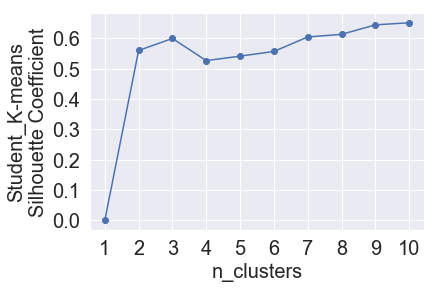

In [219]:
X = df_result['前測認知負荷']
X = np.array(X).reshape(-1, 1)
min_c = 2
max_c = 10

Scores = [0]

for k in range(min_c ,max_c+1):
    estimator = KMeans(n_clusters=k, random_state=0).fit(X)
    Scores.append(silhouette_score(X, estimator.labels_, metric='euclidean'))

x_axis = range(min_c-1, max_c+1, 1)
plt.xlabel('n_clusters',fontsize=20)
plt.ylabel('Student_K-means\nSilhouette Coefficient',fontsize=20)
plt.xticks(x_axis,fontsize=20)
plt.yticks(fontsize=20)
plt.plot(x_axis, Scores, 'o-')
plt.show()

In [328]:
df = pd.read_excel(r'C:\Users\KSLab\Google 雲端硬碟\2020 - SSCI - CAE (mapping learning theory to educational data)\數據結果\中原_期末考推薦_資訊總表.xlsx',encoding = "big5")
df = df[['Students','推薦與否(0=不推薦, 1=推薦)']]

name = 'embedding_vector_'
df_result = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/'+name+'feature_table.csv',encoding = "big5")
df_result = pd.merge(df_result, df,how='left', left_on='Students', right_on='Students')
df_result.dropna(inplace = True)


k = 2

for i in range(k):
    data_com = df_result[(df_result['kmeans_group'] == i) & (df_result['推薦與否(0=不推薦, 1=推薦)'] == 1)]['期末考(30%)']
    data_ncom = df_result[(df_result['kmeans_group'] == i) & (df_result['推薦與否(0=不推薦, 1=推薦)'] == 0)]['期末考(30%)']
    t, p = stats.ttest_ind(data_com, data_ncom)
    print('class = ', i)
    print('推薦組總人數 = ', len(data_com))
    print('非推薦組總人數 = ', len(data_ncom))
    print('推薦組期末考平均 = ', data_com.mean())
    print('非推薦組期末考平均 = ', data_ncom.mean())
    print(t, p)  


class =  0
推薦組總人數 =  42
非推薦組總人數 =  39
推薦組期末考平均 =  51.333333333333336
非推薦組期末考平均 =  39.87179487179487
2.6578865683875366 0.009513607872315163
class =  1
推薦組總人數 =  15
非推薦組總人數 =  16
推薦組期末考平均 =  67.66666666666667
非推薦組期末考平均 =  63.625
0.5601846381622342 0.5796556097119923


# Calculate Descriptive Statistics 

In [371]:
estimator = AgglomerativeClustering(n_clusters=5, affinity = 'precomputed', linkage= 'complete').fit(X)
file_name = 'SP1081_10_17_final_chap'
data = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/sequence/' + file_name + '.csv')
type_list = []

#mask  = (estimator.labels_ == 4)
#typei = data[mask]
typei = data
typei.drop(columns = '0', inplace = True)
typei = typei.reset_index(drop = True)
lenlist = []
for i in range(len(typei)):
    lenlist.append(len(typei.loc[i].dropna()))
    
lenay = np.array(lenlist)
np.mean(lenay),'/',np.std(lenay)

(2.359098228663446, '/', 1.490129140405431)

In [338]:
estimator = AgglomerativeClustering(n_clusters=5, affinity = 'precomputed', linkage= 'complete').fit(X)
file_name = 'SP1081_10_17_final_chap'
data = pd.read_csv(r'C:/Users/KSLab/Google 雲端硬碟/中原/sequence/' + file_name + '.csv')
type_list = []

#all seq.
typei = data
type_len = len(typei)
type_list.append([])
typei.drop(columns = '0', inplace = True)
typei = typei.values.tolist()
x = sum(typei, [])
print('*'*30)
print('Type = ALL','Len = '+str(type_len))
type_list[0].append(type_len)
print('完整教材錄影',Counter(x)['完整教材錄影'], Counter(x)['完整教材錄影']/type_len)
type_list[0].append(round(Counter(x)['完整教材錄影']/type_len, 4))
print('完整投影片',Counter(x)['完整投影片'], Counter(x)['完整投影片']/type_len)
type_list[0].append(round(Counter(x)['完整投影片']/type_len, 4))
print('重點整理',Counter(x)['重點整理'], Counter(x)['重點整理']/type_len)
type_list[0].append(round(Counter(x)['重點整理']/type_len, 4))
print('測驗',Counter(x)['測驗'], Counter(x)['測驗']/type_len)
type_list[0].append(round(Counter(x)['測驗']/type_len, 4))
print('考古題',Counter(x)['考古題'], Counter(x)['考古題']/type_len)
type_list[0].append(round(Counter(x)['考古題']/type_len, 4))
print('教材下載',Counter(x)['教材下載'], Counter(x)['教材下載']/type_len)
type_list[0].append(round(Counter(x)['教材下載']/type_len, 4))
print('相關規定',Counter(x)['相關規定'], Counter(x)['相關規定']/type_len)
type_list[0].append(round(Counter(x)['相關規定']/type_len, 4))
print('討論',Counter(x)['討論'], Counter(x)['討論']/type_len)
type_list[0].append(round(Counter(x)['討論']/type_len, 4))
print('課程相關疑難釋疑含相關規定',Counter(x)['課程相關疑難釋疑含相關規定'], Counter(x)['課程相關疑難釋疑含相關規定']/type_len)
type_list[0].append(round(Counter(x)['課程相關疑難釋疑含相關規定']/type_len, 4))


for i in range(0,5):
    mask  = (estimator.labels_ == i)
    typei = data[mask]
    type_len = len(typei)
    
    type_list.append([])
    #typei.drop(columns = '0', inplace = True)
    typei = typei.values.tolist()

    x = sum(typei, [])
    print('*'*30)
    print('Type = '+str(i),'Len = '+str(type_len))
    type_list[i+1].append(type_len)
    print('完整教材錄影',Counter(x)['完整教材錄影'], Counter(x)['完整教材錄影']/type_len)
    type_list[i+1].append(round(Counter(x)['完整教材錄影']/type_len, 4))
    print('完整投影片',Counter(x)['完整投影片'], Counter(x)['完整投影片']/type_len)
    type_list[i+1].append(round(Counter(x)['完整投影片']/type_len, 4))
    print('重點整理',Counter(x)['重點整理'], Counter(x)['重點整理']/type_len)
    type_list[i+1].append(round(Counter(x)['重點整理']/type_len, 4))
    print('測驗',Counter(x)['測驗'], Counter(x)['測驗']/type_len)
    type_list[i+1].append(round(Counter(x)['測驗']/type_len, 4))
    print('考古題',Counter(x)['考古題'], Counter(x)['考古題']/type_len)
    type_list[i+1].append(round(Counter(x)['考古題']/type_len, 4))
    print('教材下載',Counter(x)['教材下載'], Counter(x)['教材下載']/type_len)
    type_list[i+1].append(round(Counter(x)['教材下載']/type_len, 4))
    print('相關規定',Counter(x)['相關規定'], Counter(x)['相關規定']/type_len)
    type_list[i+1].append(round(Counter(x)['相關規定']/type_len, 4))
    print('討論',Counter(x)['討論'], Counter(x)['討論']/type_len)
    type_list[i+1].append(round(Counter(x)['討論']/type_len, 4))
    print('課程相關疑難釋疑含相關規定',Counter(x)['課程相關疑難釋疑含相關規定'], Counter(x)['課程相關疑難釋疑含相關規定']/type_len)
    type_list[i+1].append(round(Counter(x)['課程相關疑難釋疑含相關規定']/type_len, 4))
    
    
    
type_list
type_df = pd.DataFrame(type_list) 
type_df.T.to_csv('type_data.csv')


******************************
Type = ALL Len = 621
完整教材錄影 583 0.9388083735909822
完整投影片 424 0.6827697262479872
重點整理 96 0.15458937198067632
測驗 37 0.05958132045088567
考古題 24 0.03864734299516908
教材下載 164 0.2640901771336554
相關規定 23 0.037037037037037035
討論 95 0.1529790660225443
課程相關疑難釋疑含相關規定 19 0.030595813204508857
******************************
Type = 0 Len = 284
完整教材錄影 379 1.3345070422535212
完整投影片 120 0.4225352112676056
重點整理 27 0.09507042253521127
測驗 15 0.0528169014084507
考古題 2 0.007042253521126761
教材下載 45 0.15845070422535212
相關規定 5 0.017605633802816902
討論 38 0.13380281690140844
課程相關疑難釋疑含相關規定 12 0.04225352112676056
******************************
Type = 1 Len = 79
完整教材錄影 106 1.3417721518987342
完整投影片 114 1.4430379746835442
重點整理 7 0.08860759493670886
測驗 4 0.05063291139240506
考古題 0 0.0
教材下載 8 0.10126582278481013
相關規定 3 0.0379746835443038
討論 7 0.08860759493670886
課程相關疑難釋疑含相關規定 3 0.0379746835443038
******************************
Type = 2 Len = 67
完整教材錄影 39 0.582089552238806
完整投影片 34 0.507462686